In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# from sklearn.linear_model import LinearRegression

%matplotlib inline

sns.set()

In [2]:
r_insurance_df = pd.read_csv('health_insurance.csv')
r_access_df = pd.read_csv('healthcare_access.csv')

In [3]:
r_insurance_df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6


In [4]:
r_access_df

,Year,State,Yes,No,Category,Condition,Location 1
0,2010,"Nationwide (States, DC, and Territories)",85%,15%,Health Care Access/Coverage,Do you have any kind of health care coverage?,"Nationwide (States, DC, and Territories)\n"
1,2010,Nationwide (States and DC),85%,15%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Nationwide (States and DC)\n
2,2010,Guam,77.80%,22.20%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Guam\n
3,2010,Puerto Rico,92.10%,7.90%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Puerto Rico\n
4,2010,Virgin Islands,69.40%,30.60%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Virgin Islands\n
...,...,...,...,...,...,...,...
1635,2010,Alabama,79.90%,20.10%,Health Care Access/Coverage,Adults aged 18-64 who have any kind of health ...,"Alabama\n(32.84057112200048, -86.63186076199969)"
1636,1996,Mississippi,82.70%,17.30%,Health Care Access/Coverage,Adults aged 18-64 who have any kind of health ...,"Mississippi\n(32.745510099000455, -89.53803082..."
1637,1996,Virginia,85.40%,14.60%,Health Care Access/Coverage,Do you have any kind of health care coverage?,"Virginia\n(37.54268067400045, -78.45789046299967)"
1638,2006,Wyoming,82.10%,17.90%,Health Care Access/Coverage,Do you have any kind of health care coverage?,"Wyoming\n(43.23554134300048, -108.10983035299967)"


In [5]:
r_insurance_df.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [6]:
r_access_df.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1640 non-null   int64 
 1   State       1640 non-null   object
 2   Yes         1640 non-null   object
 3   No          1640 non-null   object
 4   Category    1640 non-null   object
 5   Condition   1640 non-null   object
 6   Location 1  1640 non-null   object
dtypes: int64(1), object(6)
memory usage: 89.8+ KB


In [7]:
insurance_df = r_insurance_df.copy()

access_df = r_access_df.copy()

In [8]:
insurance_df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [10]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [11]:
insurance_df.shape

(15000, 13)

In [12]:
insurance_df.columns.to_list()

['age',
 'sex',
 'weight',
 'bmi',
 'hereditary_diseases',
 'no_of_dependents',
 'smoker',
 'city',
 'bloodpressure',
 'diabetes',
 'regular_ex',
 'job_title',
 'claim']

In [13]:
access_df.head()

,Year,State,Yes,No,Category,Condition,Location 1
0,2010,"Nationwide (States, DC, and Territories)",85%,15%,Health Care Access/Coverage,Do you have any kind of health care coverage?,"Nationwide (States, DC, and Territories)\n"
1,2010,Nationwide (States and DC),85%,15%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Nationwide (States and DC)\n
2,2010,Guam,77.80%,22.20%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Guam\n
3,2010,Puerto Rico,92.10%,7.90%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Puerto Rico\n
4,2010,Virgin Islands,69.40%,30.60%,Health Care Access/Coverage,Do you have any kind of health care coverage?,Virgin Islands\n


In [14]:
access_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1640 non-null   int64 
 1   State       1640 non-null   object
 2   Yes         1640 non-null   object
 3   No          1640 non-null   object
 4   Category    1640 non-null   object
 5   Condition   1640 non-null   object
 6   Location 1  1640 non-null   object
dtypes: int64(1), object(6)
memory usage: 89.8+ KB


In [15]:
access_df.shape

(1640, 7)

In [16]:
access_df.columns.to_list()

['Year', 'State', 'Yes', 'No', 'Category', 'Condition', 'Location 1']

In [17]:
access_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1640 non-null   int64 
 1   State       1640 non-null   object
 2   Yes         1640 non-null   object
 3   No          1640 non-null   object
 4   Category    1640 non-null   object
 5   Condition   1640 non-null   object
 6   Location 1  1640 non-null   object
dtypes: int64(1), object(6)
memory usage: 89.8+ KB


In [18]:
insurance_df.isna().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [19]:
access_df.isna().sum()

Year          0
State         0
Yes           0
No            0
Category      0
Condition     0
Location 1    0
dtype: int64

## Analysis

<Figure size 800x800 with 0 Axes>

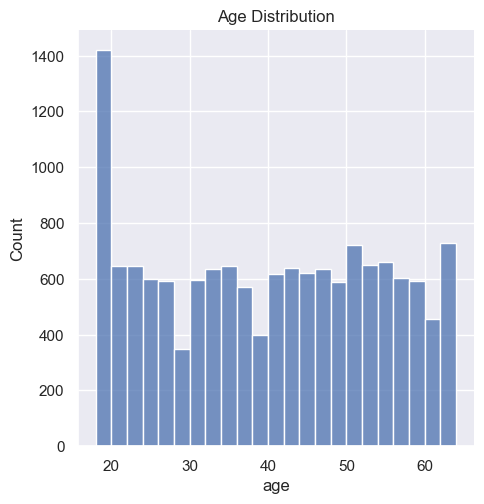

In [26]:
plt.figure(figsize=(8,8))
sns.displot(insurance_df['age'])
plt.title("Age Distribution")
plt.show()

/Users/cuddoongaraado/opt/anaconda3/envs/data_capstone_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


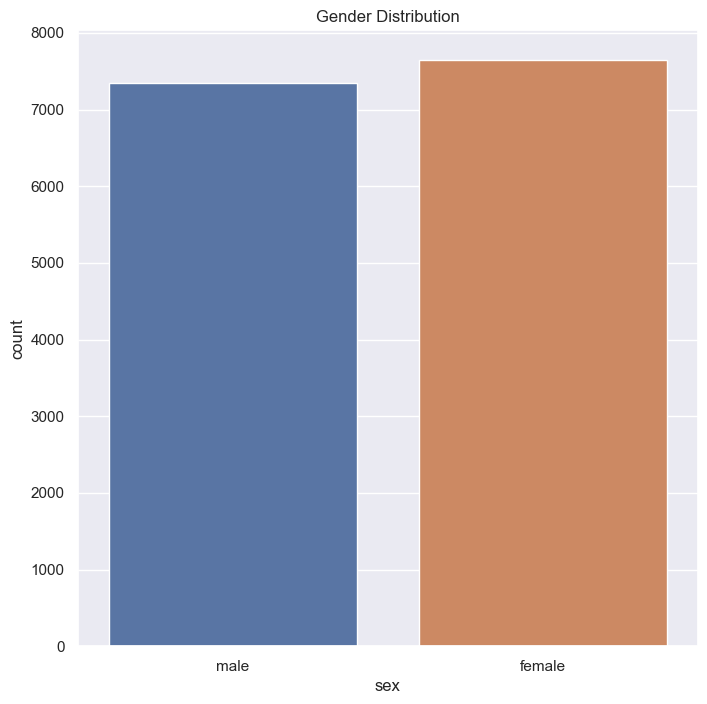

female    7652
male      7348
Name: sex, dtype: int64


In [27]:
plt.figure(figsize=(8,8))
sns.countplot(insurance_df['sex'])
plt.title("Gender Distribution")
plt.show()
print(insurance_df["sex"].value_counts())

<Figure size 800x800 with 0 Axes>

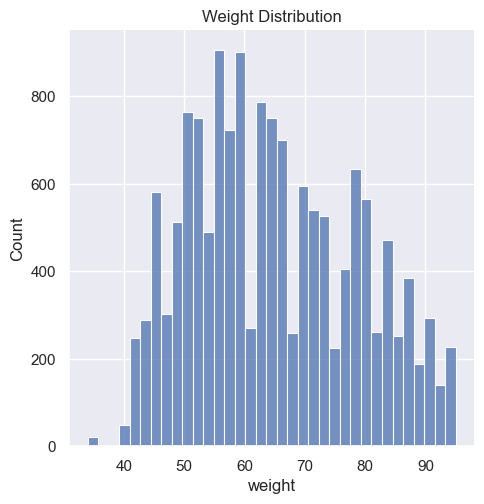

In [28]:
plt.figure(figsize=(8,8));
sns.displot(insurance_df['weight']);
plt.title("Weight Distribution");
plt.show();

<Figure size 800x800 with 0 Axes>

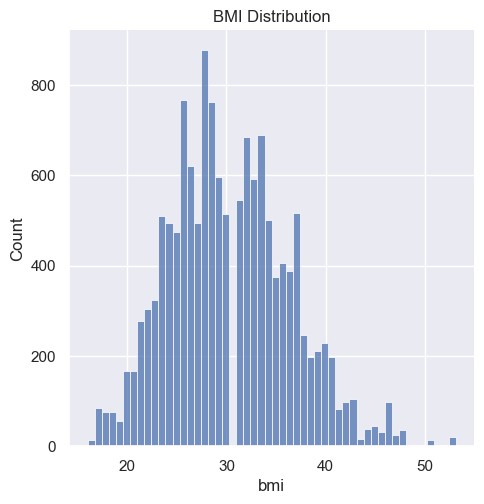

In [29]:
plt.figure(figsize=(8,8));
sns.displot(insurance_df['bmi']);
plt.title("BMI Distribution");
plt.show();

/Users/cuddoongaraado/opt/anaconda3/envs/data_capstone_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


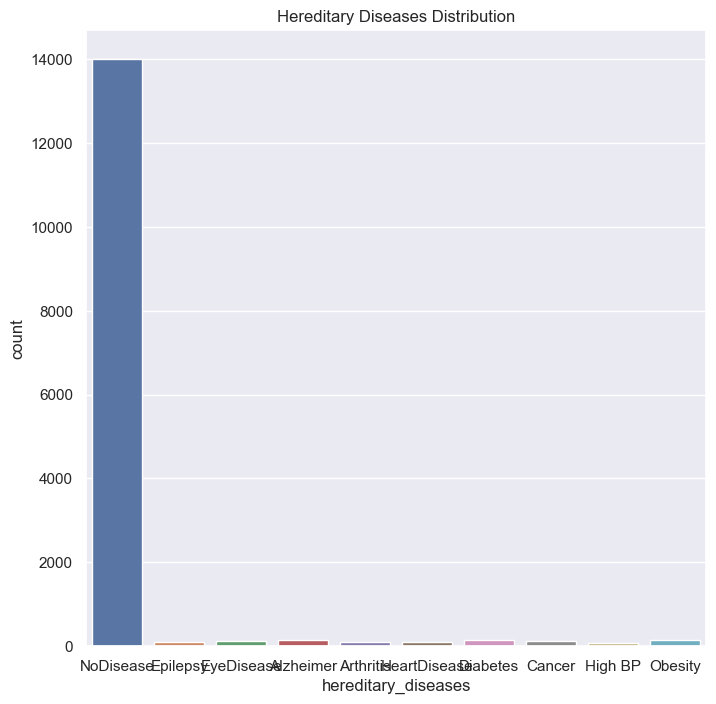

NoDisease       13998
Diabetes          148
Alzheimer         144
Obesity           136
EyeDisease        123
Cancer            109
Arthritis          96
HeartDisease       93
Epilepsy           84
High BP            69
Name: hereditary_diseases, dtype: int64


In [30]:
plt.figure(figsize=(8,8));
sns.countplot(insurance_df['hereditary_diseases']);
plt.title("Hereditary Diseases Distribution");
plt.show();
print(insurance_df["hereditary_diseases"].value_counts());

/Users/cuddoongaraado/opt/anaconda3/envs/data_capstone_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


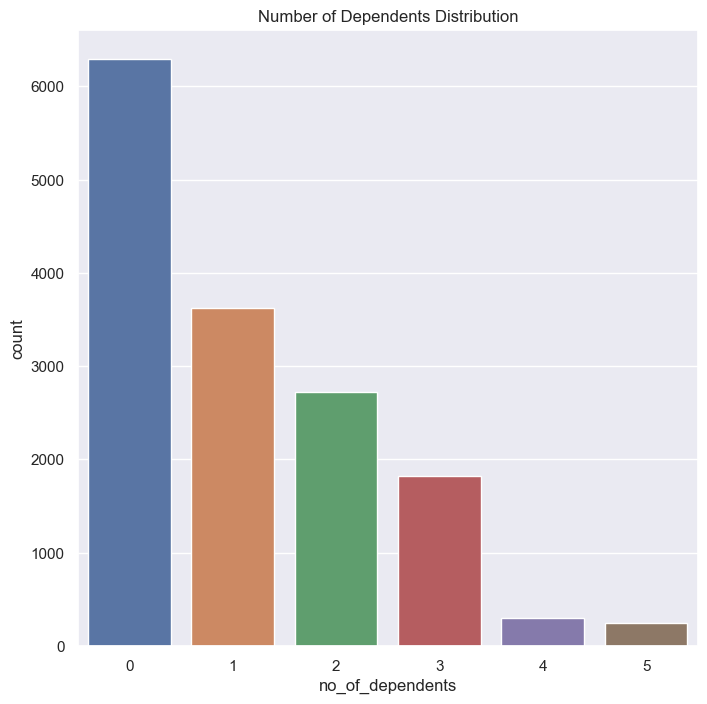

In [31]:
plt.figure(figsize=(8,8));
sns.countplot(insurance_df['no_of_dependents']);
plt.title("Number of Dependents Distribution");
plt.show();

/Users/cuddoongaraado/opt/anaconda3/envs/data_capstone_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


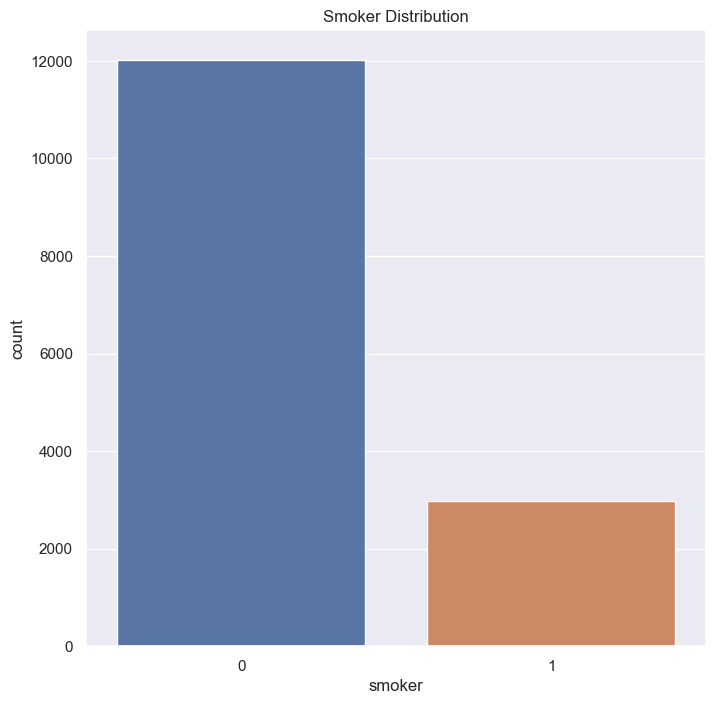

0    12028
1     2972
Name: smoker, dtype: int64


In [32]:
plt.figure(figsize=(8,8));
sns.countplot(insurance_df['smoker']);
plt.title("Smoker Distribution");
plt.show();
print(insurance_df["smoker"].value_counts());

/Users/cuddoongaraado/opt/anaconda3/envs/data_capstone_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


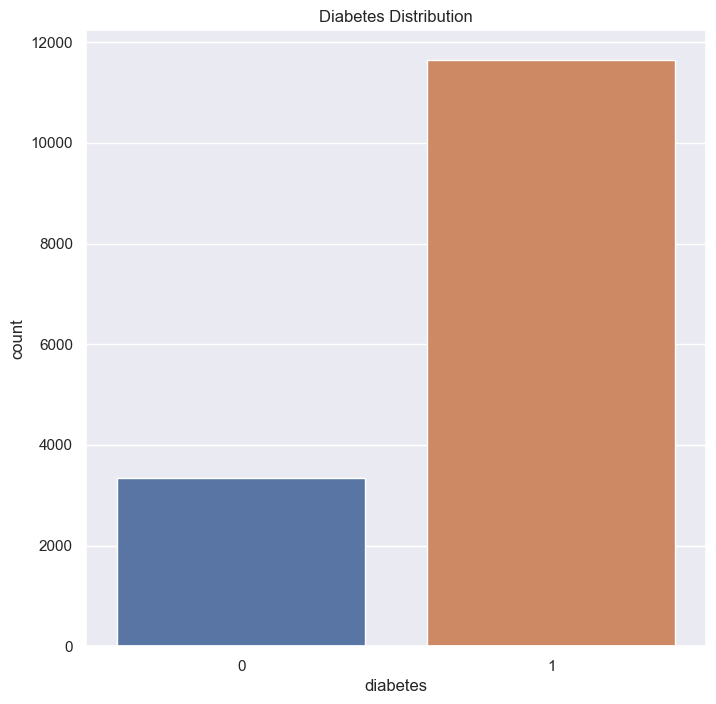

In [33]:
plt.figure(figsize=(8,8));
sns.countplot(insurance_df['diabetes']);
plt.title("Diabetes Distribution");
plt.show();

/Users/cuddoongaraado/opt/anaconda3/envs/data_capstone_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


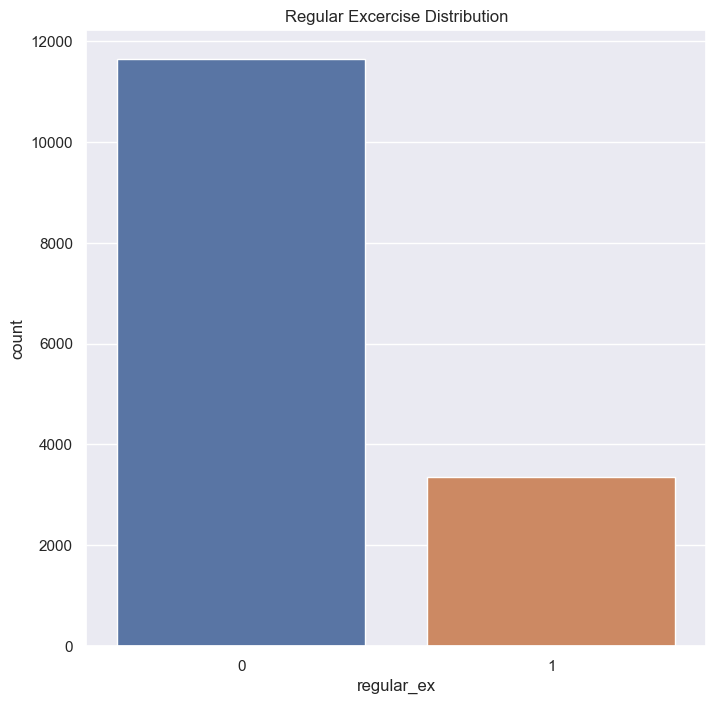

In [34]:
plt.figure(figsize=(8,8));
sns.countplot(insurance_df['regular_ex']);
plt.title("Regular Excercise Distribution");
plt.show();

<Figure size 800x800 with 0 Axes>

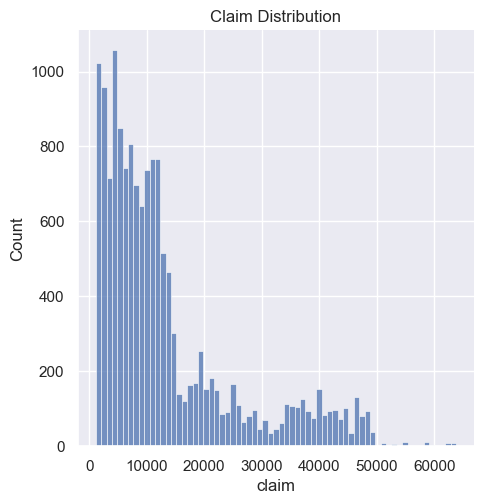

In [35]:
plt.figure(figsize=(8,8));
sns.displot(insurance_df['claim']);
plt.title("Claim Distribution");
plt.show();

## Data Cleaning

In [9]:
insurance_df.city.nunique()

91

In [47]:
insurance_df.city.unique()

array(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
       'AtlanticCity', 'Portland', 'Cambridge', 'Hartford', 'Springfield',
       'Syracuse', 'Baltimore', 'York', 'Trenton', 'Warwick',
       'WashingtonDC', 'Providence', 'Harrisburg', 'Newport', 'Stamford',
       'Worcester', 'Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
       'Louisville', 'Memphis', 'Nashville', 'NewOrleans', 'Raleigh',
       'Houston', 'Georgia', 'Oklahoma', 'Orlando', 'Macon', 'Huntsville',
       'Knoxville', 'Florence', 'Miami', 'Tampa', 'PanamaCity',
       'Kingsport', 'Marshall', 'Mandan', 'Waterloo', 'IowaCity',
       'Columbia', 'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
       'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
       'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 'Canton',
       'Columbus', 'Rochester', 'Minneapolis', 'JeffersonCity',
       'Escabana', 'Youngstown', 'SantaRosa', 'Eureka', 'SanFrancisco',
       'SanJose', 'LosAngeles', 'Ox

In [50]:
insurance_df.replace({'Boston':'MA'}, inplace=True)

In [51]:
insurance_df.city.unique()

array(['NewYork', 'MA', 'Phildelphia', 'Pittsburg', 'Buffalo',
       'AtlanticCity', 'Portland', 'Cambridge', 'Hartford', 'Springfield',
       'Syracuse', 'Baltimore', 'York', 'Trenton', 'Warwick',
       'WashingtonDC', 'Providence', 'Harrisburg', 'Newport', 'Stamford',
       'Worcester', 'Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
       'Louisville', 'Memphis', 'Nashville', 'NewOrleans', 'Raleigh',
       'Houston', 'Georgia', 'Oklahoma', 'Orlando', 'Macon', 'Huntsville',
       'Knoxville', 'Florence', 'Miami', 'Tampa', 'PanamaCity',
       'Kingsport', 'Marshall', 'Mandan', 'Waterloo', 'IowaCity',
       'Columbia', 'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
       'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
       'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 'Canton',
       'Columbus', 'Rochester', 'Minneapolis', 'JeffersonCity',
       'Escabana', 'Youngstown', 'SantaRosa', 'Eureka', 'SanFrancisco',
       'SanJose', 'LosAngeles', 'Oxnard

In [49]:
access_df.state.unique()

array(['Nationwide (States, DC, and Territories)',
       'Nationwide (States and DC)', 'Guam', 'Puerto Rico',
       'Virgin Islands', 'New Jersey', 'Texas', 'South Carolina',
       'Virginia', 'Kentucky', 'Connecticut', 'Arizona', 'Oregon',
       'Idaho', 'Vermont', 'Missouri', 'Oklahoma', 'Montana', 'Louisiana',
       'Indiana', 'Florida', 'New Hampshire', 'Kansas',
       'District of Columbia', 'New Mexico', 'Alabama', 'California',
       'Wyoming', 'New York', 'South Dakota', 'Nevada', 'Maryland',
       'Iowa', 'Massachusetts', 'Maine', 'North Carolina', 'Rhode Island',
       'Nebraska', 'Arkansas', 'Mississippi', 'Minnesota', 'Hawaii',
       'Tennessee', 'North Dakota', 'West Virginia', 'Colorado',
       'Illinois', 'Utah', 'Alaska', 'Delaware', 'Michigan', 'Washington',
       'Ohio', 'Wisconsin', 'Georgia', 'Pennsylvania'], dtype=object)

In [20]:
access_df.drop(columns=['Location 1'],inplace=True)
access_df

,Year,State,Yes,No,Category,Condition
0,2010,"Nationwide (States, DC, and Territories)",85%,15%,Health Care Access/Coverage,Do you have any kind of health care coverage?
1,2010,Nationwide (States and DC),85%,15%,Health Care Access/Coverage,Do you have any kind of health care coverage?
2,2010,Guam,77.80%,22.20%,Health Care Access/Coverage,Do you have any kind of health care coverage?
3,2010,Puerto Rico,92.10%,7.90%,Health Care Access/Coverage,Do you have any kind of health care coverage?
4,2010,Virgin Islands,69.40%,30.60%,Health Care Access/Coverage,Do you have any kind of health care coverage?
...,...,...,...,...,...,...
1635,2010,Alabama,79.90%,20.10%,Health Care Access/Coverage,Adults aged 18-64 who have any kind of health ...
1636,1996,Mississippi,82.70%,17.30%,Health Care Access/Coverage,Adults aged 18-64 who have any kind of health ...
1637,1996,Virginia,85.40%,14.60%,Health Care Access/Coverage,Do you have any kind of health care coverage?
1638,2006,Wyoming,82.10%,17.90%,Health Care Access/Coverage,Do you have any kind of health care coverage?


In [21]:
access_df.drop(columns=['Condition'],inplace=True)
access_df

,Year,State,Yes,No,Category
0,2010,"Nationwide (States, DC, and Territories)",85%,15%,Health Care Access/Coverage
1,2010,Nationwide (States and DC),85%,15%,Health Care Access/Coverage
2,2010,Guam,77.80%,22.20%,Health Care Access/Coverage
3,2010,Puerto Rico,92.10%,7.90%,Health Care Access/Coverage
4,2010,Virgin Islands,69.40%,30.60%,Health Care Access/Coverage
...,...,...,...,...,...
1635,2010,Alabama,79.90%,20.10%,Health Care Access/Coverage
1636,1996,Mississippi,82.70%,17.30%,Health Care Access/Coverage
1637,1996,Virginia,85.40%,14.60%,Health Care Access/Coverage
1638,2006,Wyoming,82.10%,17.90%,Health Care Access/Coverage


In [53]:
access_df.drop(columns=['category'],inplace=True)
access_df

,year,state,yes,no
0,2010,"Nationwide (States, DC, and Territories)",85%,15%
1,2010,Nationwide (States and DC),85%,15%
2,2010,Guam,77.80%,22.20%
3,2010,Puerto Rico,92.10%,7.90%
4,2010,Virgin Islands,69.40%,30.60%
...,...,...,...,...
1635,2010,Alabama,79.90%,20.10%
1636,1996,Mississippi,82.70%,17.30%
1637,1996,Virginia,85.40%,14.60%
1638,2006,Wyoming,82.10%,17.90%


In [22]:
access_df.describe()

,Year
count,1640.000000
mean,2002.665854
std,4.735653
min,1995.000000
25%,1998.000000
50%,2003.000000
75%,2007.000000
max,2010.000000


In [23]:
insurance_df.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


In [24]:
insurance_df.columns = insurance_df.columns.str.lower()

insurance_df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [25]:
access_df.columns = access_df.columns.str.lower()
access_df.head()

,year,state,yes,no,category
0,2010,"Nationwide (States, DC, and Territories)",85%,15%,Health Care Access/Coverage
1,2010,Nationwide (States and DC),85%,15%,Health Care Access/Coverage
2,2010,Guam,77.80%,22.20%,Health Care Access/Coverage
3,2010,Puerto Rico,92.10%,7.90%,Health Care Access/Coverage
4,2010,Virgin Islands,69.40%,30.60%,Health Care Access/Coverage


In [55]:
insurance_df.drop(columns=['bloodpressure'],inplace=True)
insurance_df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,diabetes,regular_ex,job_title,claim
0,60.0,0,64,24.3,NoDisease,1,0,NewYork,0,0,Actor,13112.6
1,49.0,1,75,22.6,NoDisease,1,0,MA,1,1,Engineer,9567.0
2,32.0,1,64,17.8,Epilepsy,2,1,Phildelphia,1,1,Academician,32734.2
3,61.0,1,53,36.4,NoDisease,1,1,Pittsburg,1,0,Chef,48517.6
4,19.0,1,50,20.6,NoDisease,0,0,Buffalo,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,0,49,28.3,NoDisease,1,1,Florence,1,0,FilmMaker,21082.2
14996,39.0,0,74,29.6,NoDisease,4,0,Miami,1,0,Student,7512.3
14997,20.0,0,62,33.3,NoDisease,0,0,Tampa,1,0,FashionDesigner,1391.5
14998,52.0,0,88,36.7,NoDisease,0,0,PanamaCity,1,0,Farmer,9144.6


## Encoding columns

In [36]:
insurance_df.replace({'sex':{'male':0, 'female':1}},inplace = True)

In [37]:
insurance_df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,0,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,1,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,1,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,1,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,1,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


/Users/cuddoongaraado/opt/anaconda3/envs/data_capstone_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


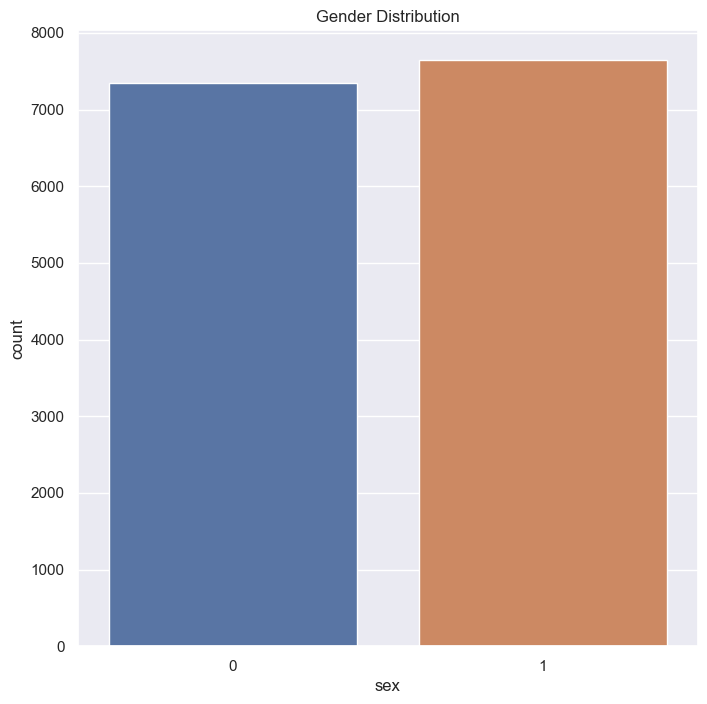

1    7652
0    7348
Name: sex, dtype: int64


In [56]:
plt.figure(figsize=(8,8))
sns.countplot(insurance_df['sex'])
plt.title("Gender Distribution")
plt.show()
print(insurance_df["sex"].value_counts())

<Figure size 800x800 with 0 Axes>

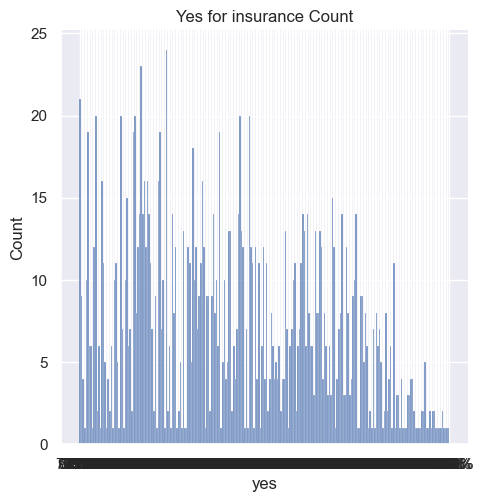

In [38]:
plt.figure(figsize=(8,8));
sns.displot(access_df['yes']);
plt.title("Yes for insurance Count");
plt.show();

<Figure size 800x800 with 0 Axes>

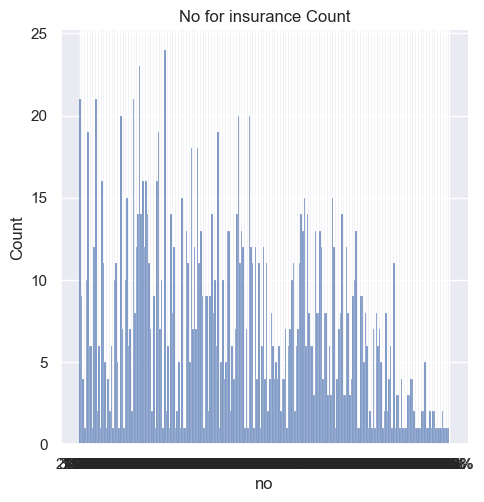

In [39]:
plt.figure(figsize=(8,8));
sns.displot(access_df['no']);
plt.title("No for insurance Count");
plt.show();

<Figure size 800x800 with 0 Axes>

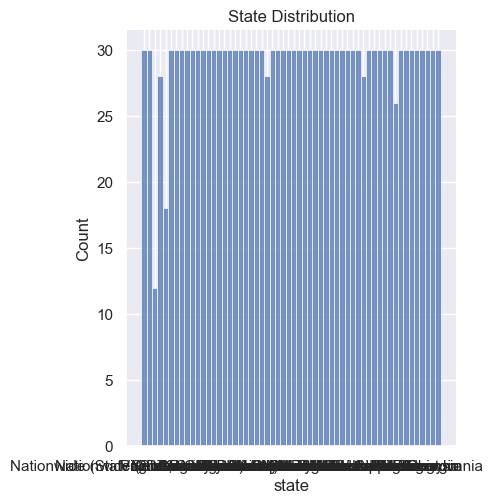

In [40]:
plt.figure(figsize=(8,8));
sns.displot(access_df['state']);
plt.title("State Distribution");
plt.show();

In [41]:
access_df.head()

,year,state,yes,no,category
0,2010,"Nationwide (States, DC, and Territories)",85%,15%,Health Care Access/Coverage
1,2010,Nationwide (States and DC),85%,15%,Health Care Access/Coverage
2,2010,Guam,77.80%,22.20%,Health Care Access/Coverage
3,2010,Puerto Rico,92.10%,7.90%,Health Care Access/Coverage
4,2010,Virgin Islands,69.40%,30.60%,Health Care Access/Coverage


In [57]:
insurance_df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,diabetes,regular_ex,job_title,claim
0,60.0,0,64,24.3,NoDisease,1,0,NewYork,0,0,Actor,13112.6
1,49.0,1,75,22.6,NoDisease,1,0,MA,1,1,Engineer,9567.0
2,32.0,1,64,17.8,Epilepsy,2,1,Phildelphia,1,1,Academician,32734.2
3,61.0,1,53,36.4,NoDisease,1,1,Pittsburg,1,0,Chef,48517.6
4,19.0,1,50,20.6,NoDisease,0,0,Buffalo,1,0,HomeMakers,1731.7


In [43]:
import seaborn as sns
from scipy.stats import zscore

In [44]:
sns.boxplot(data=access_df['yes'])

ValueError: could not convert string to float: '85%'

In [ ]:
access_df['yes'].describe()